In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

investment_data = pd.DataFrame({
    'InvestmentID': [101, 102, 103, 104, 105],
    'InvestorID': [1, 2, 3, 4, 5],
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Action': ['Buy', 'Buy', 'Sell', 'Buy', 'Sell'],
    'StockName': ['AAPL', 'GOOG', 'AAPL', 'GOOG', 'AAPL'],
    'Quantity': [10, 5, 8, 15, 20],
    'Price': [150.0, 2500.0, 160.0, 2550.0, 155.0],
})

churn_data = pd.DataFrame({
    'InvestorID': [1, 2, 3, 4, 5],
    'Churn': [0, 0, 1, 0, 1],  # 0: Not churned, 1: Churned
})


data = pd.merge(investment_data, churn_data, on='InvestorID')


data['Date'] = pd.to_datetime(data['Date']).astype(int) // 10**9


encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(data[['Action', 'StockName']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Action', 'StockName']))
data = pd.concat([data.drop(['Action', 'StockName'], axis=1), encoded_df], axis=1)


X = data.drop(['InvestmentID', 'InvestorID', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)




Accuracy: 1.0
Confusion Matrix:
 [[1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Accuracy: 1.0
Confusion Matrix:
 [[1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



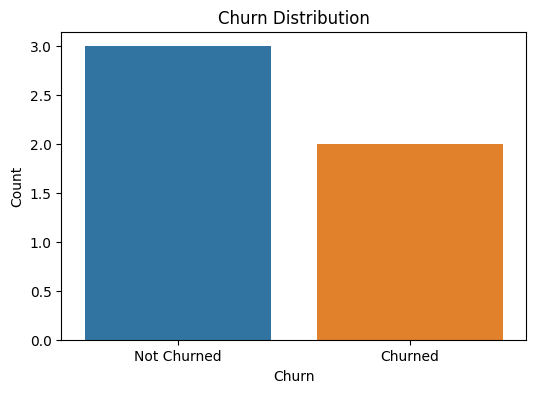

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

investment_data = pd.DataFrame({
    'InvestmentID': [101, 102, 103, 104, 105],
    'InvestorID': [1, 2, 3, 4, 5],
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Action': ['Buy', 'Buy', 'Sell', 'Buy', 'Sell'],
    'StockName': ['AAPL', 'GOOG', 'AAPL', 'GOOG', 'AAPL'],
    'Quantity': [10, 5, 8, 15, 20],
    'Price': [150.0, 2500.0, 160.0, 2550.0, 155.0],
})

churn_data = pd.DataFrame({
    'InvestorID': [1, 2, 3, 4, 5],
    'Churn': [0, 0, 1, 0, 1],  # 0: Not churned, 1: Churned
})

data = pd.merge(investment_data, churn_data, on='InvestorID')

data['Date'] = pd.to_datetime(data['Date']).astype(int) // 10**9

encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(data[['Action', 'StockName']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Action', 'StockName']))
data = pd.concat([data.drop(['Action', 'StockName'], axis=1), encoded_df], axis=1)

X = data.drop(['InvestmentID', 'InvestorID', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Data Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()
